Today we will be focusing in on a specific python package called pandas! (No not the fuzzy black and white bears!)

Pandas is an advanced python data analysis module and is integral to everything we will be doing! You got a flavor of it last week in the notebook where we plotted temperature data. The last part where we used xarrays is integrated with pandas!

So to start, we need to make sure we have pandas installed, so:

In [8]:
import pandas as pd
#Here we import it and rename it to pd. This allows us to import modules by saying pd.Series rather than pandas.Series.
#It just makes the code easier to read and write

If it gives you an error, then run the next cell. If not, you can skip it and go to the next text section

In [2]:
#RUN ONLY IF PANDAS DID NOT IMPORT
!pip install pandas
import pandas as pd

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Pandas consists of two basic components: Series and DataFrames.NOTE: DataFrames is one word with the D and F both capitalized!

A Series is just a list/column of data. So if we look at the arrays we had last week we saw something similar to:

                                          1  3  4  5   
                                          2  9  8  3
                                          3  2  1  0
                                          4  0  7  6

These arrays consisted of rows and columns, the one above would be a (4,4) arrays with 4 rows and 4 columns. 

A Series would consist of one of these columns. So the above array would consist of 4 Series since it has 4 columns.

A DataFrame is a collection of Series! So the above array would be analagous to a DataFrame since it contains 4 Series. 

Series:


    Series1      Series2      Series3      Series4
  0    1       0    3       0    4       0    5
  1    2       1    9       1    8       1    3
  2    3       2    2       2    1       2    0
  3    4       3    0       3    7       3    6
  
Each Series has an index numbered 0-n where n = number of elements in the series. Each Series also has a name describing what the data in it represents. In this case, we named each series based on the number of the column it was in the array.
   

DataFrame:

            Series1      Series2      Series3      Series4
       0       1            3            4            5
       1       2            9            8            3
       2       3            2            1            0
       3       4            0            7            6
       

This is the common look of a DataFrame. On the left side we have an index. Unless specifically defined by the user, it is just numbered 0-n where n = the number of rows in the DataFrame. Each column in the DataFrame has a specific name to it to better identify what the data in it represents. In the above case, each column has the name of a Series.

That's it for the basic syntax of pandas! Now we get into the fun part!

We can build DataFrames either by combining Series or more easily, by using a dictionary.

Remember: A dictionary is a python object where there is a key value followed by the data related to that key value. This way, data can be accessed based on the key value that is searched for.

Example:  dict = { 'apples': [0,1,2,3], 'oranges': [3,4,0,9]}
       

In [12]:
dict = {'apples':[0,1,2,3], 'oranges': [3,4,0,9]}
print(dict)
#Adds new line
print('')
#Now if we want to get the values in apples, we can say
print(dict['apples'])

{'apples': [0, 1, 2, 3], 'oranges': [3, 4, 0, 9]}

[0, 1, 2, 3]


In [13]:
#Now if we want to make a DataFrame out of the above dictionary we can say

fruits = pd.DataFrame(dict)
fruits

,apples,oranges
0,0,3
1,1,4
2,2,0
3,3,9


So we see each of the key values (apple,orange) became the name of a column and the index was set to the number of elements in each column. If the columns do not have the same number of elements in them, then pandas will return an error saying "the arrays must be the same length"

Let's say we don't want numbers for our index, but we want our DataFrame to tell us how many of each fruit that people have. We can tell the DataFrame what we want the index to be when we create it by using the index=[] option.

pd.DataFrame(data,index=[]) (We will fill in the inside of the [] with strings of text for the index)

In [55]:
fruits = pd.DataFrame(dict,index=['Chris','Frank','Lena','Danny'])
fruits

,apples,oranges
Chris,0,3
Frank,1,4
Lena,2,0
Danny,3,9


So now the DataFrame has a list of the fruits and a list of the people. Now we can get the data from the DataFrame in multiple ways

In [56]:
#Get the Data based on the column name
print('Column Name Based')
print(fruits['apples'])

#We can also get the column name this way
print("Alternative Column Name Based")
print(fruits.apples)

#Get the data based on the index
print('Index Based')
fruits.loc['Lena']
#Here we have to use the .loc function of the DataFrame to locate the row based on the text we tell it to look for.

Column Name Based
Chris    0
Frank    1
Lena     2
Danny    3
Name: apples, dtype: int64
Alternative Column Name Based
Chris    0
Frank    1
Lena     2
Danny    3
Name: apples, dtype: int64
Index Based


apples     2
oranges    0
Name: Lena, dtype: int64

In [28]:
#Now let's go back to our DataFrame with the numbered index
fruits = pd.DataFrame(dict)
print(fruits)
#If we want to get the data based on the index, we need to use the iloc function rather than the loc function
fruits.iloc[1]

   apples  oranges
0       0        3
1       1        4
2       2        0
3       3        9


apples     1
oranges    4
Name: 1, dtype: int64

Now we are going to work with some real data to learn more about some DataFrame and pandas functions. We will be using NAM MOS data from this morning at KLWM (File will be provided for the class)

This data is saved as a csv file (comma separated value). Pandas can import this data easily

In [75]:
#Import the data

klwm_mos = pd.read_csv('H:/Python/MOS/klwm_mos_103.csv') #Change the path to where the file is on your system
klwm_mos

,Unnamed: 0,3/OCT,3/OCT.1,3/OCT.2,3/OCT.3,3/OCT.4,3/OCT.5,4/OCT,4/OCT.1,4/OCT.2,...,4/OCT.5,4/OCT.6,4/OCT.7,5/OCT,5/OCT.1,5/OCT.2,5/OCT.3,5/OCT.4,6/OCT,6/OCT.1
0,HR,06,09,12,15,18,21,00,03,06,...,15,18,21,00,03,06,09,12,18,00
1,X/N,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,NaN,...,NaN,NaN,NaN,57,NaN,NaN,NaN,37,NaN,58
2,TMP,49,47,46,51,54,53,50,49,50,...,53,55,54,49,44,41,39,40,56,49
3,DPT,39,38,36,37,37,39,42,45,47,...,43,40,36,35,32,31,30,31,31,35
4,CLD,OV,BK,OV,OV,OV,OV,OV,OV,OV,...,OV,BK,CL,CL,CL,CL,CL,CL,CL,CL
5,WDR,03,03,03,04,07,11,11,10,07,...,36,34,33,33,34,01,01,36,34,17
6,WSP,08,06,05,05,04,03,02,03,03,...,11,10,12,07,06,04,04,03,03,02
7,P06,NaN,NaN,0,NaN,0,NaN,6,NaN,78,...,NaN,34,NaN,0,NaN,0,NaN,0,1,4
8,P12,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,34,NaN,NaN,NaN,1,NaN,4
9,Q06,NaN,NaN,0,NaN,0,NaN,0,NaN,1,...,NaN,0,NaN,0,NaN,0,NaN,0,0,0


In [76]:
#This data has the dates and times for the column names and numbers for the rows. Let's change it to make it easier to read
#To change the labels of the columns and the rows, pandas has a transpose function for DataFrames

klwm_mos = klwm_mos.T
klwm_mos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,HR,X/N,TMP,DPT,CLD,WDR,WSP,P06,P12,Q06,Q12,CIG,VIS,OBV
3/OCT,06,NaN,49,39,OV,03,08,NaN,NaN,NaN,NaN,6,7,N
3/OCT.1,09,NaN,47,38,BK,03,06,NaN,NaN,NaN,NaN,8,7,N
3/OCT.2,12,NaN,46,36,OV,03,05,0,NaN,0,NaN,8,7,N
3/OCT.3,15,NaN,51,37,OV,04,05,NaN,NaN,NaN,NaN,7,7,N
3/OCT.4,18,NaN,54,37,OV,07,04,0,NaN,0,NaN,6,7,N
3/OCT.5,21,NaN,53,39,OV,11,03,NaN,NaN,NaN,NaN,7,7,N
4/OCT,00,56,50,42,OV,11,02,6,6,0,0,6,7,N
4/OCT.1,03,NaN,49,45,OV,10,03,NaN,NaN,NaN,NaN,4,5,BR
4/OCT.2,06,NaN,50,47,OV,07,03,78,NaN,1,NaN,3,3,BR


In [77]:
#Now we have the data somewhat more legible. The columns name are numbers now and we want them to be the values in the first
#row. We can change that by renaming the columns based on the names in the row!

klwm_mos.columns = klwm_mos.iloc[0]

#Then we get rid of the the row, since we only needed the names for the columns
klwm_mos = klwm_mos.iloc[pd.RangeIndex(len(klwm_mos)).drop(0)]

#Then we reset the index so we have a numbered index. We do this because we have similar names in some of the indices (3/OCT, 4/OCT)
#This way, we can access individual rows as needed without needing to use names.
klwm_mos = klwm_mos.reset_index()
klwm_mos

Unnamed: 0,index,HR,X/N,TMP,DPT,CLD,WDR,WSP,P06,P12,Q06,Q12,CIG,VIS,OBV
0,3/OCT,06,NaN,49,39,OV,03,08,NaN,NaN,NaN,NaN,6,7,N
1,3/OCT.1,09,NaN,47,38,BK,03,06,NaN,NaN,NaN,NaN,8,7,N
2,3/OCT.2,12,NaN,46,36,OV,03,05,0,NaN,0,NaN,8,7,N
3,3/OCT.3,15,NaN,51,37,OV,04,05,NaN,NaN,NaN,NaN,7,7,N
4,3/OCT.4,18,NaN,54,37,OV,07,04,0,NaN,0,NaN,6,7,N
5,3/OCT.5,21,NaN,53,39,OV,11,03,NaN,NaN,NaN,NaN,7,7,N
6,4/OCT,00,56,50,42,OV,11,02,6,6,0,0,6,7,N
7,4/OCT.1,03,NaN,49,45,OV,10,03,NaN,NaN,NaN,NaN,4,5,BR
8,4/OCT.2,06,NaN,50,47,OV,07,03,78,NaN,1,NaN,3,3,BR
9,4/OCT.3,09,NaN,50,48,OV,05,03,NaN,NaN,NaN,NaN,3,4,BR


So now that we have the mos data in this DataFrame, we can manipulate it as we see fit and put it to use!

To start, let's make a plot of the Dew Point and Temperature for the next couple of days!

First, we will need the TMP and DPT columns of the data. Then we need to plot it.

In [78]:
#First, check that the data is in numeric units. We need it to be numeric to plot it
klwm_mos['TMP']

0     49
1     47
2     46
3     51
4     54
5     53
6     50
7     49
8     50
9     50
10    50
11    53
12    55
13    54
14    49
15    44
16    41
17    39
18    40
19    56
20    49
Name: TMP, dtype: object

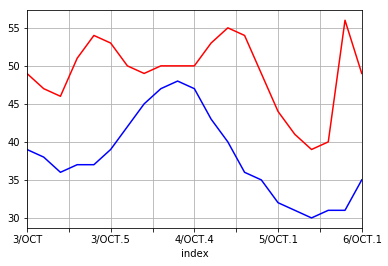

In [79]:
#The dtype is an object! To fix this, we need to convert it to a number.
#Pandas as a built in function called pd.to_numeric

klwm_mos.TMP = pd.to_numeric(klwm_mos.TMP)
klwm_mos.DPT = pd.to_numeric(klwm_mos.DPT)
klwm_mos.DPT
#Next we can plot the data. Pandas has built in plotting functions since it is tied to numpy
ax = klwm_mos.plot(x = 'index',y = ['TMP','DPT'],legend=False,grid=True,color=['r','b'])

Let's say we wanted to make this graph easier to read. We can create a column showing the data by hours and the day. 

To do that, we need to take each of the hours and convert it to local time. Then we can add in labels for AM and PM based on the resulting numbers.

In [1]:
#First convert the data to local time.
klwm_mos['HR'] = pd.to_numeric(klwm_mos['HR']) -4

#Next, loop through the data and add an AM or PM where it is needed.
i = 0 
index = len(df.HR)
while i < index:
    if(df.HR[i] < 0 and df.HR[i] != -4 and df.HR[i] != -1):
        df.HR[i] = str(df.HR[i] + 12) + ' AM'
    elif(df.HR[i] > 12):
        df.HR[i] = str(df.HR[i] - 12) + ' PM'
    elif(df.HR[i]  < 0 and df.HR[i] == -4):
        df.HR[i] = str(df.HR[i] + 12) + ' PM'
        df['index'][i] = df['index'][i].replace(df['index'][i],df['index'][i-1],1)
    elif(df.HR[i] < 0 and df.HR[i] == -1):
        df.HR[i] = str(df.HR[i] + 12) + ' PM'
        df['index'][i] = df['index'][i].replace(df['index'][i],df['index'][i-1],1)
    else:
        df.HR[i] = str(df.HR[i]) + ' AM'
    i = i + 1
    
#IGNORE THE WARNING MESSAGES. THEY ARE JUST SAYING WE ARE MESSING WITH THE DATAFRAME, WHICH WE WANT TO DO ANYWAYS

#Now we need to create a new column. Creating a new column is as simple as defining a new column name
klwm_mos['dateandtime'] = klwm_mos['index'].map(str) + ' '+  klwm_mos['HR'].map(str) + 'z'


NameError: name 'pd' is not defined

Text(0, 0.5, 'Degrees F')

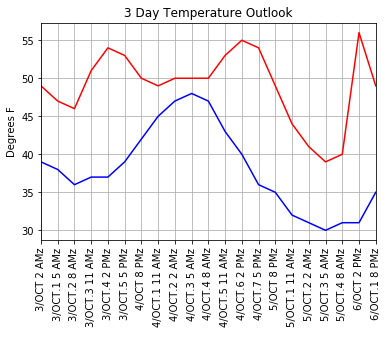

In [84]:
#Now the new column [dateandtime] has been added to the end of the DataFrame.
klwm_mos

#Now let's try to plot it again
ax = klwm_mos.plot(x='dateandtime',y=['TMP','DPT'],legend=False,grid=True,color=['r','b'])
ax.set_xticks(range(len(klwm_mos.HR)));
ax.set_xticklabels(["%s" % item for item in klwm_mos.dateandtime.tolist()], rotation=90);
ax.set_title('3 Day Temperature Outlook')
ax.set_xlabel(' ')
ax.set_ylabel('Degrees F')